# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Tô Quốc Thanh
- MSSV: 22127388
- Lớp: 22CLC10

# Import

In [2]:
import pandas as pd
import numpy as np

# Import thêm dữ thư viện nếu cần

import matplotlib.pyplot as plt #ve do thi
import seaborn as sns #ve do thi

# Đọc dữ liệu

In [4]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [10]:
# Cài đặt các hàm cần thiết ở đây

features = [
    'Hours Studied',
    'Previous Scores',
    'Extracurricular Activities',
    'Sleep Hours',
    'Sample Question Papers Practiced'
]

def preprocess(x):
    ''' 
    This function is used to preprocess the data. It adds a column of ones to the input data and squares the input data.

    Parameters
    ----------
    x : np.array
        Input data

    Returns
    -------
    X : np.array
        Preprocessed input data
    '''
    X = np.hstack((np.ones((x.shape[0], 1)), x))

    return X

class OLSLinearRegression:
    def fit(self, X, y):
        ''' 
        This function is used to fit the model to the data. It uses the Ordinary Least Squares method to find the optimal parameters.

        Parameters
        ----------
        X : np.array
            Input data
        y : np.array
            Output data

        Returns
        -------
        self : object
            Returns the instance of the class
        
        '''

        X_pinv = np.linalg.inv(X.T @ X) @ X.T
        self.w = X_pinv @ y

        return self


    def get_params(self):
        ''' 
        This function is used to get the parameters of the model.

        Returns
        -------
        self.w : np.array
            Optimal parameters (column vector)
        '''

        return self.w


    def predict(self, X):
        ''' 
        This function is used to predict the output of the model.

        Parameters
        ----------
        X : np.array
            Input data

        Returns
        -------
        X @ self.w : np.array
            Predicted output
        '''

        return X @ self.w

def calc_MAE(y_true, y_pred):
    ''' 
    This function is used to calculate the Mean Absolute Error.

    Parameters
    ----------
    y_true : np.array
        True output data
    y_pred : np.array
        Predicted output data

    Returns
    -------
    MAE : float
        Mean Absolute Error
    '''
    MAE = np.mean(np.abs(y_true - y_pred))

    return MAE

def shuffle_index(size: int):
    ''' 
    This function is used to shuffle the index of the data.

    Parameters
    ----------
    size : int
        Size of the data

    Returns
    -------
    shuffled_index : np.array
        Shuffled index
    '''
    shuffled_index = np.arange(size) #tạo mảng từ 0 đến size-1
    np.random.shuffle(shuffled_index)

    return shuffled_index

*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu (1 điểm)

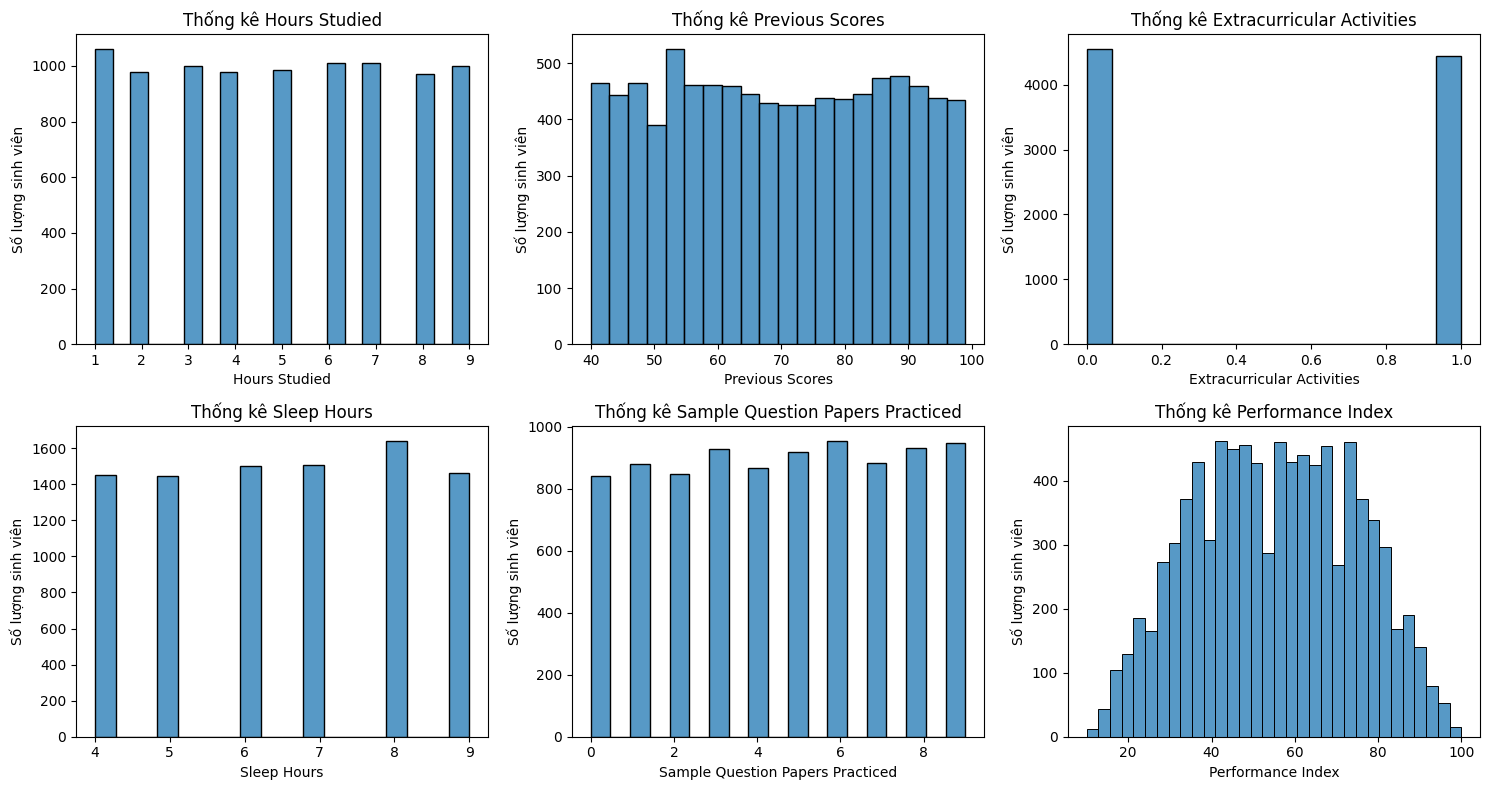

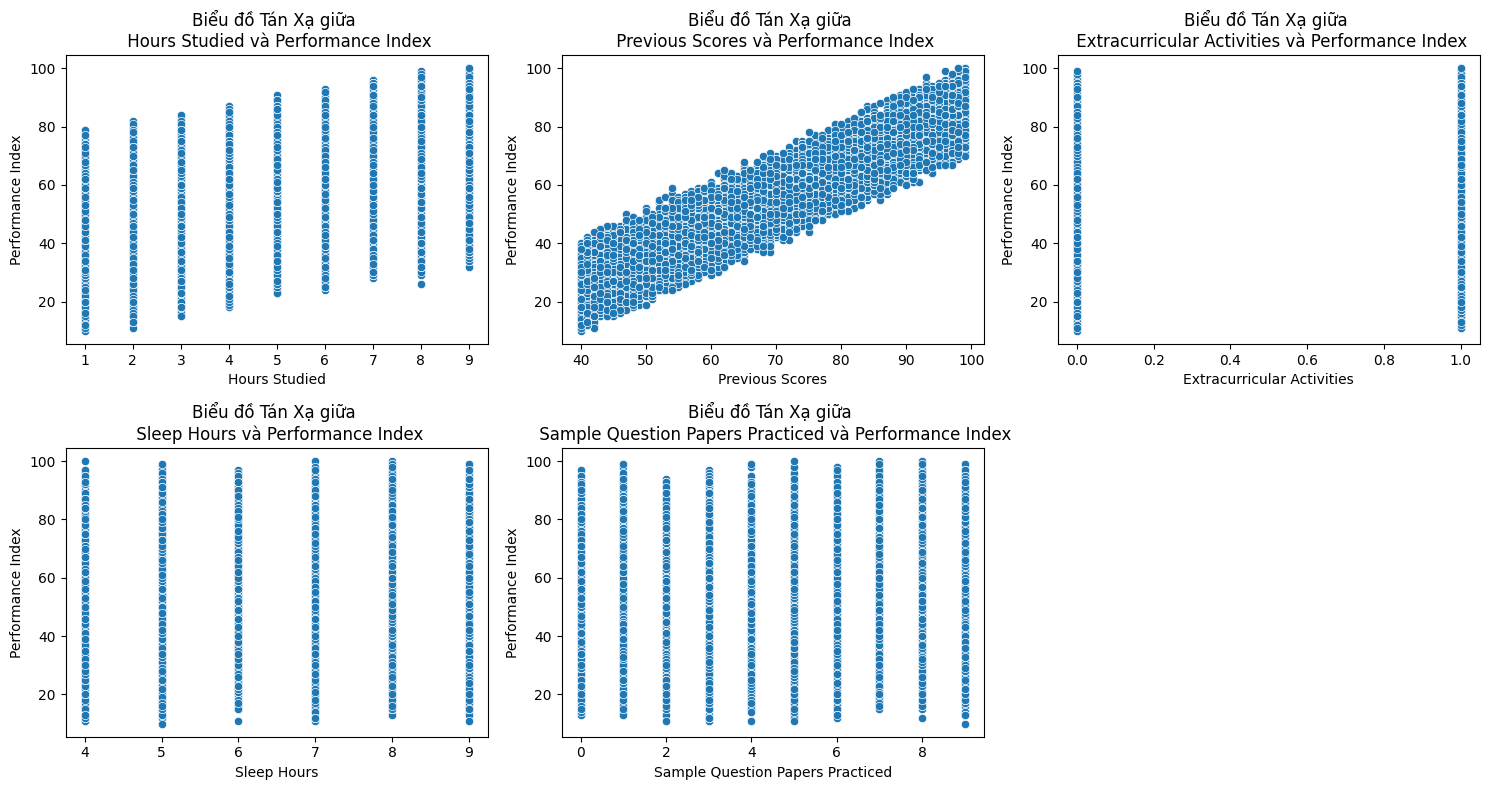

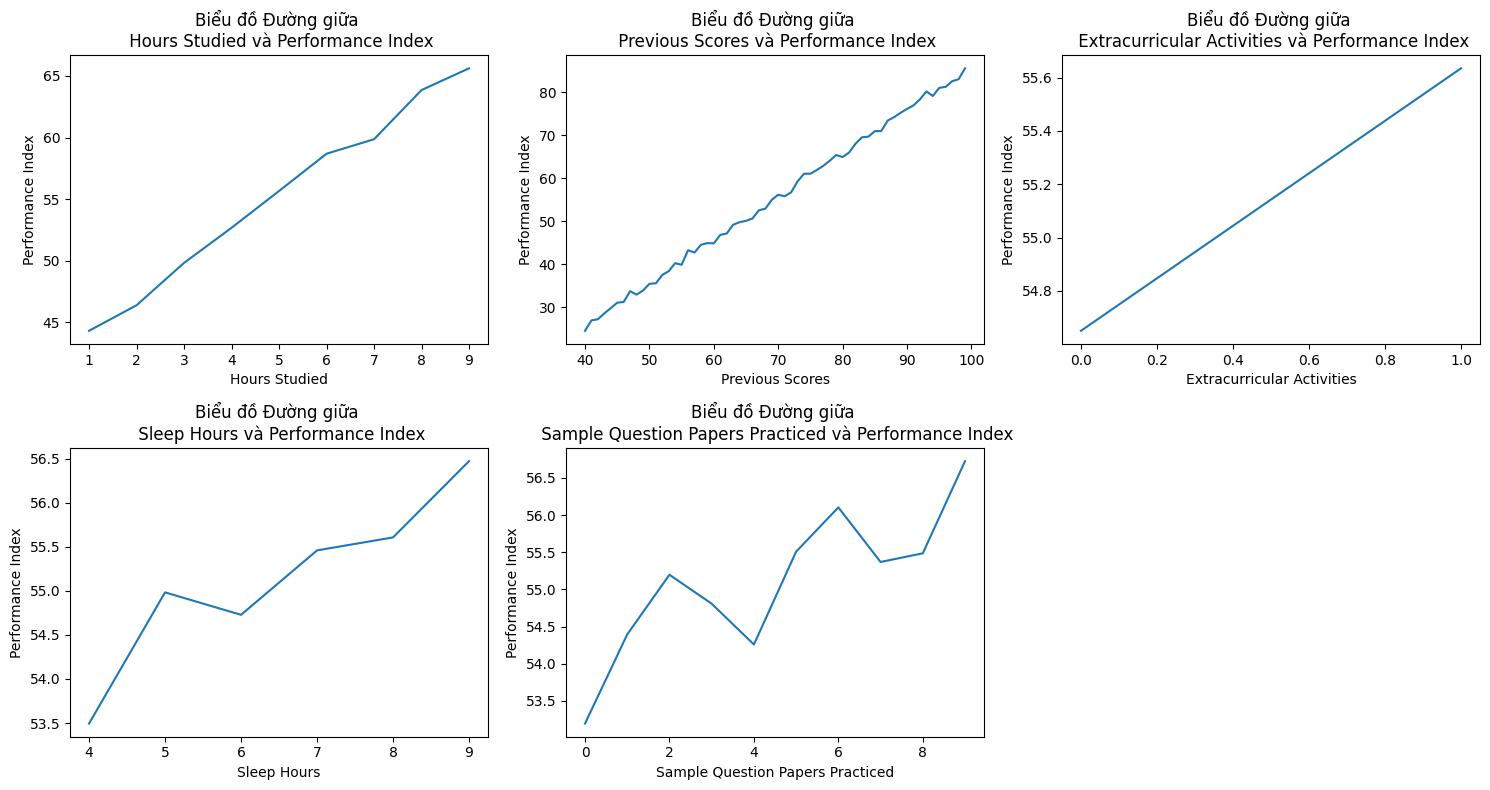

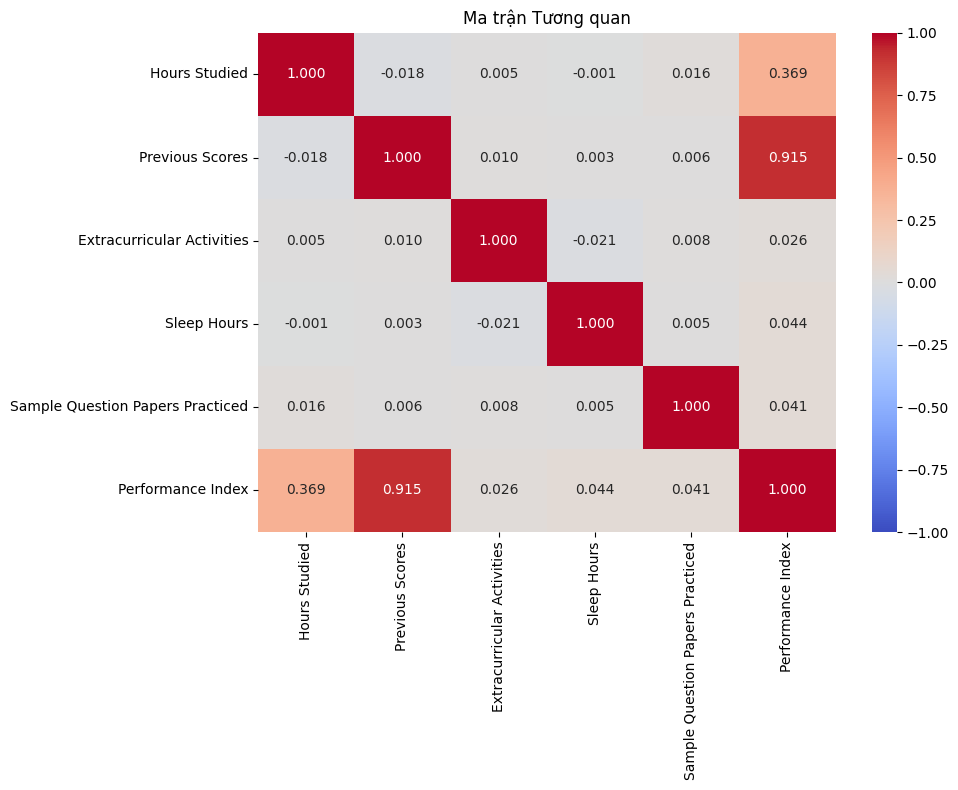

In [16]:
def setup_plot_grid(num_plots, plot_size=(15, 4)):
    '''
    This function is used to set up a grid of subplots for plotting multiple plots.
    
    Parameters
    ----------
    num_plots : int
        Number of plots to be displayed
    plot_size : tuple, optional
        Size of each plot, by default (15, 4)
    Returns
    -------
    fig : matplotlib.figure.Figure
        Figure object for the plots
    axes : numpy.ndarray
        Array of axes objects for the plots
    
    '''
    num_cols = 3
    num_rows = (num_plots + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(plot_size[0], num_rows * plot_size[1]))
    axes = axes.flatten()
    return fig, axes

def plot_histograms(data):
    '''
    This function is used to plot histograms for each feature in the dataset.
    Parameters
    ----------
    data : pd.DataFrame
        Input data
    Returns
    -------
    None
        Shows the plot
    '''
    
    fig, axes = setup_plot_grid(len(data.columns))

    for i, column in enumerate(data.columns):
        sns.histplot(data[column], ax=axes[i])
        axes[i].set_title(f'Thống kê {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Số lượng sinh viên')

    plt.tight_layout()
    plt.show()

def plot_line_plots(data, target_column):
    '''
    This function is used to plot line plots for each feature against the target column.
    Parameters
    ----------
    data : pd.DataFrame
        Input data
    target_column : str
        Name of the target column
    Returns
    -------
    None
        Shows the plot
    '''
    fig, axes = setup_plot_grid(len(data.columns) - 1)

    for i, column in enumerate(data.columns[:-1]):  
        sns.lineplot(data=data, x=column, y=target_column, ax=axes[i], errorbar=None)
        axes[i].set_title(f'Biểu đồ Đường giữa \n {column} và {target_column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel(target_column)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

def plot_correlation_heatmap(data):
    '''
    This function is used to plot the correlation heatmap for the input data.
    Parameters
    ----------
    data : pd.DataFrame
        Input data
    Returns
    -------
    None
        Shows the plot
    '''
    corr_matrix = data.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1)
    plt.title('Ma trận Tương quan')
    plt.tight_layout()
    plt.show()

def plot_scatter_plots(data, target_column):
    '''
    This function is used to plot scatter plots for each feature against the target column.
    Parameters
    ----------
    data : pd.DataFrame
        Input data
    target_column : str
        Name of the target column
    Returns
    -------
    None
        Shows the plot
    '''
    fig, axes = setup_plot_grid(len(data.columns) - 1)    
    for i, column in enumerate(data.columns[:-1]):  
        sns.scatterplot(data=data, x=column, y=target_column, ax=axes[i])
        axes[i].set_title(f'Biểu đồ Tán Xạ giữa \n {column} và {target_column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel(target_column)

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Call the functions with the training data
plot_histograms(train)
plot_scatter_plots(train, target_column='Performance Index')
plot_line_plots(train, target_column='Performance Index')
plot_correlation_heatmap(train)


# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp (2 điểm) 

In [129]:
# Phần code cho yêu cầu 2a

X_train_2a = np.array(X_train).reshape(-1, 5)
X_train_2a_reprocessed = preprocess(X_train_2a)

y_train_2a = np.array(y_train).reshape(-1, 1)


X_test_2a = np.array(X_test).reshape(-1, 5)
X_test_2a_reprocessed = preprocess(X_test_2a)

y_test_2a = np.array(y_test).reshape(-1, 1)

lr_2a = OLSLinearRegression().fit(X_train_2a_reprocessed, y_train_2a)
y_pred_2a = lr_2a.predict(X_test_2a_reprocessed)
w = lr_2a.get_params()

for i, wi in enumerate(w):
    print(f'w{i}: ', end='')
    print(f'{wi[0]:.3f}')

w0: -33.969
w1: 2.852
w2: 1.018
w3: 0.604
w4: 0.474
w5: 0.192


In [131]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
lr_2a_MAE = calc_MAE(y_test_2a, y_pred_2a)
print(f'MAE: {lr_2a_MAE:.3f}')

MAE: 1.596


Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = - 33.969 + 2.852 * (Hours Studied) + 1.018 * (Previous Scores) + 0.604 * (Extracurricular Activities) + 0.474 * (Sleep Hours) + 0.192 * (Sample Question Papers Practiced)$$

# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất (2 điểm)

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [137]:
# Phần code cho yêu cầu 2b
# Tìm ra đặc trưng tốt nhất (trong 5 đặc trưng)
# In ra các kết quả cross-validation như yêu cầu

X_train_2b = np.array(X_train).reshape(-1, 5)
y_train_2b = np.array(y_train).reshape(-1, 1)
X_train_2b_preprocessed = preprocess(X_train_2b)

size = X_train.shape[0]
shuffled_index = shuffle_index(size)

num_folds = 5
x_train_fold = []
y_train_fold = []

for i in range(num_folds):
    start = i*size//num_folds
    end = (i+1)*size//num_folds
    x_train_fold.append(X_train_2b_preprocessed[shuffled_index[start:end]])
    y_train_fold.append(y_train_2b[shuffled_index[start:end]])

best_feature = None
MIN_MAE = float('inf')

for i, fe in enumerate(features):
    MAE = []
    #like a preprocessing step
    x_train_fold_fe = [arr[:, [0, i + 1]] for arr in x_train_fold]
    
    for j in range(num_folds):
        x_train_fe = [x_train_fold_fe[k] for k in range(num_folds) if k != j]
        y_train_fe = [y_train_fold[k] for k in range(num_folds) if k != j]
        x_train_fe = np.concatenate(x_train_fe, axis=0)
        y_train_fe = np.concatenate(y_train_fe, axis=0)
        x_test_fe = x_train_fold_fe[j]
        y_test_fe = y_train_fold[j]
        lr_2b = OLSLinearRegression().fit(x_train_fe, y_train_fe)
        y_pred = lr_2b.predict(x_test_fe)
        MAE.append(calc_MAE(y_test_fe, y_pred))
    print(f'Feature: {fe}')
    print(f'Mean MAE: {np.mean(MAE):.3f}')
    print('----------------')
    if MIN_MAE > np.mean(MAE):
        MIN_MAE = np.mean(MAE)
        best_feature = fe

print(f'Best feature: {best_feature}, MAE: {MIN_MAE:.3f}')

Feature: Hours Studied
Mean MAE: 15.453
----------------
Feature: Previous Scores
Mean MAE: 6.618
----------------
Feature: Extracurricular Activities
Mean MAE: 16.198
----------------
Feature: Sleep Hours
Mean MAE: 16.192
----------------
Feature: Sample Question Papers Practiced
Mean MAE: 16.191
----------------
Best feature: Previous Scores, MAE: 6.618


In [139]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
X_train_2b_best = np.array(X_train[best_feature]).reshape(-1, 1)
X_train_2b_best_preprocessed = preprocess(X_train_2b_best)

y_train_2b = np.array(y_train).reshape(-1, 1)

lr_2b_best = OLSLinearRegression().fit(X_train_2b_best_preprocessed, y_train_2b)

X_test_2b_best = np.array(X_test[best_feature]).reshape(-1, 1)
X_test_2b_best_preprocessed = preprocess(X_test_2b_best)

y_test_2b = np.array(y_test).reshape(-1, 1)
y_pred = lr_2b_best.predict(X_test_2b_best_preprocessed)
w = lr_2b_best.get_params()

for i, wi in enumerate(w):
    print(f'w{i}: ', end='')
    print(f'{wi[0]:.3f}')

w0: -14.989
w1: 1.011


In [140]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model
lr_2b_MAE = calc_MAE(y_test_2b, y_pred)
print(f'MAE: {lr_2b_MAE:.3f}')

MAE: 6.544


Công thức hồi quy (dựa trên mô hình đặc trưng tốt nhất), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -14.989 + 1.011 * (Previous Scores)$$

# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất (2 điểm)

## Xây dựng/Thiết kế mô hình

In [12]:
# Trình bày toàn bộ code liên quan đến việc thiết kế mô hình
def preprocess_2c(x, name_model):
    ''' 
    This function is used to preprocess the data. It adds a column of ones to the input data and squares the input data.

    Parameters
    ----------
    x : np.array
        Input data
    name_model : str
        Name of the model
    Returns
    -------
    X : np.array
        Preprocessed input data
    '''
    if name_model == '2c1':
        X = np.hstack((np.ones((x.shape[0], 1)), x**2))
    if name_model == '2c2':
        X = np.hstack((np.ones((x.shape[0], 1)), x))
    if name_model == '2c3':
        X = np.zeros((x.shape[0], 1))
        for i in range(x.shape[1]):
            X[:, 0] = X[:, 0] + x[:, i]
        X = np.hstack((np.ones((x.shape[0], 1)), X))
        
    return X

y_train_2c = np.array(y_train).reshape(-1, 1)

list_models = []
#Mô hình 2c1
features_2c1 = ['Previous Scores']
X_train_2c1 = np.array(X_train[features_2c1]).reshape(-1, len(features_2c1))
X_train_2c1_reprocessed = preprocess_2c(X_train_2c1, '2c1')
lr_2c1 = OLSLinearRegression().fit(X_train_2c1_reprocessed, y_train_2c)
w = lr_2c1.get_params()
print('Model 2c1')
for i, wi in enumerate(w):
    print(f'w{i}: ', end='')
    print(f'{wi[0]:.3f}')
print('----------------')
list_models.append( {
    'name': '2c1',
    'model': lr_2c1,
    'features': features_2c1,
    'des': 'Model created by increased demension of feature Previous Scores'
})
#Mô hình 2c2

features_2c2 = ['Hours Studied', 'Previous Scores', 'Sleep Hours']
X_train_2c2 = np.array(X_train[features_2c2]).reshape(-1, len(features_2c2))
X_train_2c2_reprocessed = preprocess_2c(X_train_2c2, '2c2')
lr_2c2 = OLSLinearRegression().fit(X_train_2c2_reprocessed, y_train_2c)
w = lr_2c2.get_params()
print('Model 2c2')
for i, wi in enumerate(w):
    print(f'w{i}: ', end='')
    print(f'{wi[0]:.3f}')
print('----------------')
list_models.append( {
    'name': '2c2',
    'model': lr_2c2,
    'features': features_2c2,
    'des': 'Model created by use Hours Studied and Previous Scores, Sleep Hours'
})
#Mô hình 2c3
features_2c3 = ['Hours Studied', 'Previous Scores']
X_train_2c3 = np.array(X_train[features_2c3]).reshape(-1, len(features_2c3))
X_train_2c3_reprocessed = preprocess_2c(X_train_2c3, '2c3')
lr_2c3 = OLSLinearRegression().fit(X_train_2c3_reprocessed, y_train_2c)
w = lr_2c3.get_params()
print('Model 2c3')
for i, wi in enumerate(w):
    print(f'w{i}: ', end='')
    print(f'{wi[0]:.3f}')
print('----------------')
list_models.append( {
    'name': '2c3',
    'model': lr_2c3,
    'features': features_2c3,
    'des': 'Model created by "new feature" = Hours Studied + Previous Scores'
})


Model 2c1
w0: 18.364
w1: 0.007
----------------
Model 2c2
w0: -32.820
w1: 2.856
w2: 1.018
w3: 0.472
----------------
Model 2c3
w0: -23.231
w1: 1.054
----------------


## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [13]:
# Phần code cho yêu cầu 2c
# Tìm ra mô hình tốt nhất (trong m mô hình mà sinh viên tự thiết kế)
# In ra các kết quả cross-validation như yêu cầu

X_train_2c = np.array(X_train).reshape(-1, 5)
y_train_2c = np.array(y_train).reshape(-1, 1)
X_train_2c_preprocessed = preprocess(X_train_2c)

size = X_train.shape[0]
shuffled_index = shuffle_index(size)

num_folds = 5
x_train_fold = []
y_train_fold = []

for i in range(num_folds):
    start = i*size//num_folds
    end = (i+1)*size//num_folds
    x_train_fold.append(X_train_2c_preprocessed[shuffled_index[start:end]])
    y_train_fold.append(y_train_2c[shuffled_index[start:end]])

# List of model names
best_model = None
MIN_MAE = float('inf')

# Iterate over the model names
for i, model in enumerate(list_models):
    MAE = []
    selected_index = []
    selected_index = [features.index(f) + 1 for f in model['features']]
    selected_index.append(0)
    x_train_fold_model = [arr[:, selected_index] for arr in x_train_fold]
    for j in range(num_folds):
        x_train_model = [x_train_fold_model[k] for k in range(num_folds) if k != j]
        y_train_model = [y_train_fold[k] for k in range(num_folds) if k != j]
        x_train_model = np.concatenate(x_train_model, axis=0)
        y_train_model = np.concatenate(y_train_model, axis=0)
        x_test_model = x_train_fold_model[j]
        y_test_model = y_train_fold[j]
        lr_2c = OLSLinearRegression().fit(x_train_model, y_train_model)
        y_pred = lr_2c.predict(x_test_model)
        MAE.append(calc_MAE(y_test_model, y_pred))
    print(f'Model: {model["name"]}')
    print(f'Mean MAE: {np.mean(MAE):.3f}')
    print(f'Description: {model["des"]}')
    print('----------------')
    if MIN_MAE > np.mean(MAE):
        MIN_MAE = np.mean(MAE)
        best_model = model

print(f'Best model: {best_model["name"]}')
print(f'MAE: {MIN_MAE:.3f}')

Model: 2c1
Mean MAE: 6.620
Description: Model created by increased demension of feature Previous Scores
----------------
Model: 2c2
Mean MAE: 1.703
Description: Model created by use Hours Studied and Previous Scores, Sleep Hours
----------------
Model: 2c3
Mean MAE: 1.816
Description: Model created by "new feature" = Hours Studied + Previous Scores
----------------
Best model: 2c2
MAE: 1.703


In [14]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
X_train_2c_best = np.array(X_train[best_model["features"]]).reshape(-1, len(best_model["features"]))
X_train_2c_best_preprocessed = preprocess_2c(X_train_2c_best, best_model["name"])

y_train_2c = np.array(y_train).reshape(-1, 1)

lr_2c_best = OLSLinearRegression().fit(X_train_2c_best_preprocessed, y_train_2c)

X_test_2c_best = np.array(X_test[best_model["features"]]).reshape(-1, len(best_model["features"]))
X_test_2c_best_preprocessed = preprocess_2c(X_test_2c_best, best_model["name"])

y_test_2c = np.array(y_test).reshape(-1, 1)
y_pred = lr_2c_best.predict(X_test_2c_best_preprocessed)
w = lr_2c_best.get_params()

for i, wi in enumerate(w):
    print(f'w{i}: ', end='')
    print(f'{wi[0]:.3f}')


w0: -32.820
w1: 2.856
w2: 1.018
w3: 0.472


In [15]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
lr_2c_MAE = calc_MAE(y_test_2c, y_pred)
print(f'MAE: {lr_2c_MAE:.3f}')

MAE: 1.694


Công thức hồi quy (dựa trên mô hình tốt nhất mà sinh viên tự xây dựng/thiết kế), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = -32.820 + 2.856 * (Hours Studied) + 1.018 * (Previous Scores) + 0.472 * (Sleep Hours)$$